In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
load_data = pd.read_csv('advertising.csv')
load_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


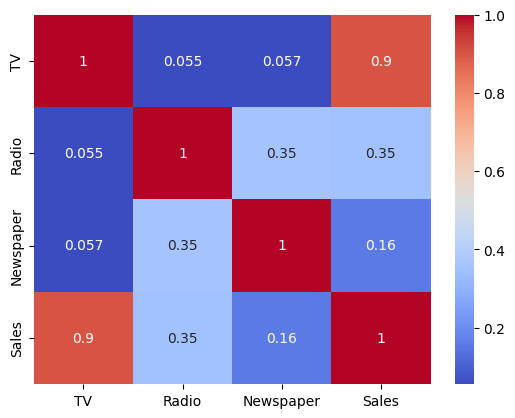

In [5]:
sns.heatmap(load_data.corr() , annot=True , cmap='coolwarm')
plt.show()

In [6]:
x = load_data[['TV' ,'Radio' , 'Newspaper']]
y = load_data['Sales']

In [7]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [10]:
X_train

,TV,Radio,Newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [11]:
from sklearn.preprocessing import StandardScaler
StandardScale = StandardScaler()

StandardScale.fit_transform(X_train)

array([[ 1.66759336e+00,  2.65124045e-01, -1.39553662e+00],
       [-1.67747330e+00, -7.95575100e-01, -3.48504325e-01],
       [-2.70817401e-01, -1.28512855e+00, -1.03198374e+00],
       [-1.59351200e+00,  1.03345099e+00, -1.03198374e+00],
       [-6.83322893e-01, -9.65558937e-01, -1.30828393e+00],
       [-9.29122625e-01, -1.61829687e+00, -1.03683111e+00],
       [ 3.87487823e-01, -3.87613890e-01, -2.41862146e-01],
       [ 2.48769162e-01,  6.52687194e-01,  3.93143554e-01],
       [-3.75464812e-01,  8.90664566e-01,  2.35632912e+00],
       [ 6.45455859e-01, -2.17630053e-01, -9.64120538e-01],
       [-1.66169991e-01,  3.73913701e-01, -8.72020475e-01],
       [ 3.44898760e-01,  1.36661931e+00, -1.40038400e+00],
       [ 8.01210144e-01, -1.32592467e+00,  9.31201819e-01],
       [ 1.03605840e+00,  9.65457454e-01, -3.58199068e-01],
       [-1.69572575e+00,  1.50260638e+00,  1.87643931e+00],
       [-4.38739991e-01,  3.19518873e-01, -7.94462527e-01],
       [-8.13523741e-01, -9.45160877e-01

In [12]:
StandardScale.transform(X_test)

array([[ 0.0820634 ,  0.53029883,  1.08147034],
       [ 0.47266595,  1.62499474,  1.08147034],
       [ 1.65907555,  0.30592017,  0.61127528],
       [-1.76265142,  0.89066457,  0.70822272],
       [ 0.77565671,  1.71338634, -1.32767342],
       [-0.99118097,  0.76147685,  1.0717756 ],
       [ 0.73306764,  1.36661931, -0.1643042 ],
       [-1.29660539, -0.82957187, -0.59087291],
       [ 0.80121014, -1.38711885, -0.84778362],
       [ 0.22564938, -0.08844234,  0.04413279],
       [-1.52171901,  0.05434409, -1.37614714],
       [-1.22116191, -1.23073372, -0.0431199 ],
       [ 0.94844662, -1.38711885,  2.62778193],
       [-1.83931173,  0.41470982, -1.02713637],
       [-0.20754222, -1.47551045, -0.19338843],
       [ 0.1660247 , -1.0879473 ,  0.22348554],
       [-1.81619196,  0.29232146,  0.52402259],
       [ 0.49943622, -0.03404751, -0.79446253],
       [-0.98874731, -0.23802811,  0.09260651],
       [ 0.9837347 ,  0.25152534, -0.94957842],
       [ 0.8876051 ,  0.57789431,  2.113

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linearRegression = LinearRegression()

linearRegression.fit(X_train , y_train)

LinearRegression()

In [14]:
mse = cross_val_score(linearRegression , X_train , y_train , scoring='neg_mean_squared_error' , cv=5)

In [15]:
np.mean(mse)

np.float64(-3.003567374110978)

In [16]:
x_pred = linearRegression.predict(X_test)

In [17]:
x_pred

array([17.16807449, 20.5091305 , 23.73135731,  9.48459836, 21.58624062,
       12.76341388, 21.07612667,  8.79591649, 17.20467764, 16.72119979,
        8.97652259,  8.62700484, 18.42182115,  8.16102354, 12.72198768,
       15.01276938,  8.33546776, 17.87499103, 11.14052514, 20.4116162 ,
       20.9672174 , 13.01538836, 10.97713042, 22.52442657,  9.44900883,
        8.04519101, 20.86050789, 13.82515212, 10.87609343,  7.99397378,
       15.97284197, 10.72032118, 20.92393845, 10.79529851, 21.58216953,
       21.09152023, 12.17615116, 22.88913523, 12.61859879,  6.6010841 ,
       11.99190551, 15.30146497, 10.07089809,  9.55698762, 17.2102045 ,
        7.33269292, 10.52208395, 15.26836587, 11.26742672, 11.78599487,
       13.96969153, 14.66883212, 10.7619555 ,  9.51803749,  9.10445302,
       12.57686342, 10.55260009, 25.02632834,  8.00209792, 15.8239148 ,
       21.20319099, 17.02286072, 12.92029502, 10.11841929, 20.91220381,
        7.62205941])

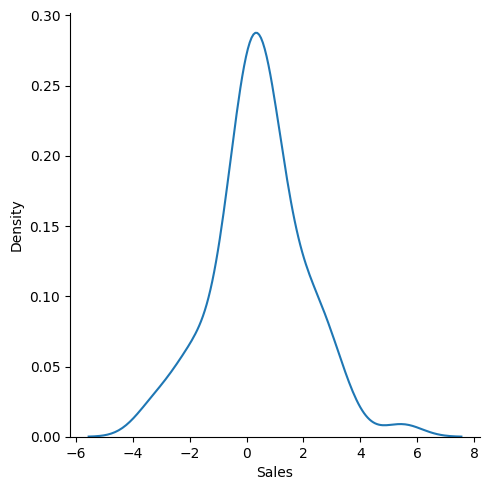

In [18]:
sns.displot(x_pred-y_test , kind='kde')

In [19]:
from sklearn.metrics import r2_score

socre_chk = r2_score(x_pred , y_test)

In [20]:
socre_chk

0.8907090550712663

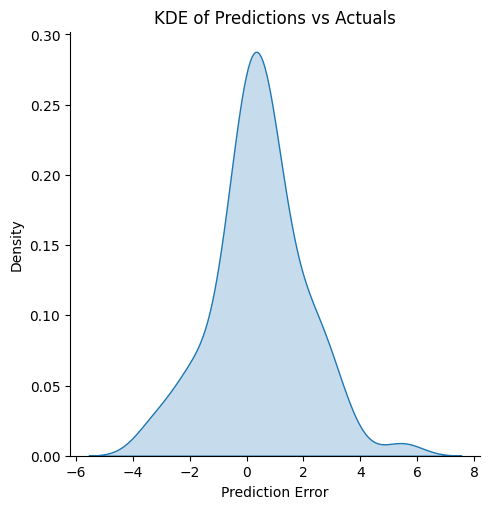

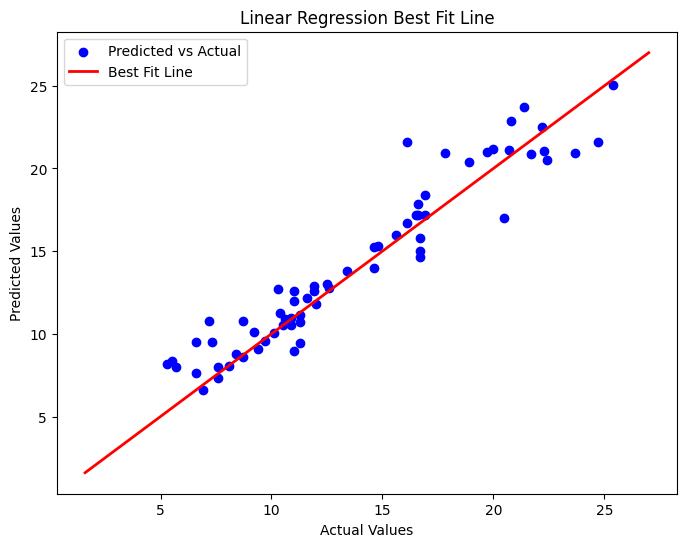

In [21]:
sns.displot(x_pred - y_test , kind='kde' , fill = True)
plt.title('KDE of Predictions vs Actuals')
plt.xlabel('Prediction Error')
plt.ylabel('Density')

plt.figure(figsize=(8,6))
plt.scatter(y_test , x_pred , color ='Blue' , label = 'Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Best Fit Line')
plt.title('Linear Regression Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Rigde 

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
Ridge = Ridge()

Ridge

Ridge()

In [26]:
paremeters = {'alpha':[1,2,3,4,6,5,4,10,90,10]}
Grid = GridSearchCV(Ridge , paremeters , scoring='neg_mean_squared_error' , cv=5 )
Grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 6, 5, 4, 10, 90, 10]},
             scoring='neg_mean_squared_error')

In [27]:
print(Grid.best_params_)

{'alpha': 90}


In [28]:
print(Grid.best_score_)

-3.0032333993675064


In [29]:
predict = Grid.predict(X_test)

In [30]:
predict

array([17.1668978 , 20.50245377, 23.7305635 ,  9.48121956, 21.5758038 ,
       12.76113249, 21.06902051,  8.7993359 , 17.21040718, 16.72168899,
        8.97445826,  8.63317673, 18.43230183,  8.15765369, 12.72911683,
       15.01850798,  8.33483321, 17.87404299, 11.1419027 , 20.40899773,
       20.96716784, 13.01663775, 10.97036497, 22.52280647,  9.45203475,
        8.0520724 , 20.85414846, 13.82697482, 10.87991528,  7.99103547,
       15.97939804, 10.72069248, 20.91715225, 10.79253726, 21.58587121,
       21.08620977, 12.16687341, 22.88924691, 12.62005111,  6.60807426,
       11.99691482, 15.30477634, 10.07029508,  9.56005116, 17.21643897,
        7.3385028 , 10.52547863, 15.26757616, 11.27387492, 11.78382722,
       13.96218585, 14.67332304, 10.75647555,  9.51433978,  9.11128753,
       12.58308751, 10.5538003 , 25.02130596,  8.00255557, 15.82915062,
       21.205981  , 17.02322221, 12.92303623, 10.11701807, 20.91733946,
        7.62426367])

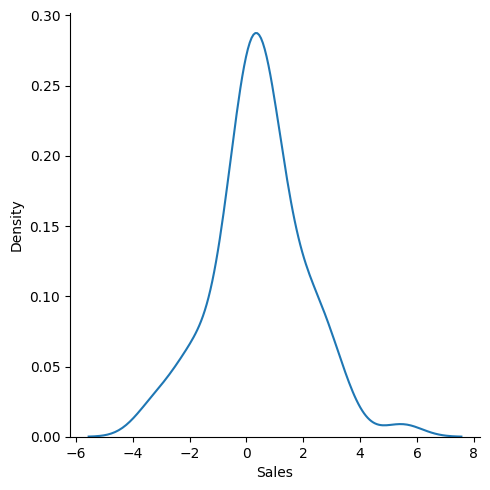

In [31]:
sns.displot(predict-y_test,kind='kde')